In [2]:
import numpy as np
import pandas as pd



import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as pp
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import date, time, datetime, timedelta 
import calendar
import glob
import folium 
import statistics

%matplotlib inline

In [6]:
csv_files = glob.glob('Datasets/RideIndego 2016/*.csv')
df = pd.concat([pd.read_csv(f) for f  in csv_files], ignore_index = True)

In [7]:
#df.head ()

In [8]:
#df.nunique()

# 4.Extras 

# Average uses per bicycle 

In [9]:
#calculate trips per bike
use_bikes = df.groupby(["bike_id"], as_index=False)["trip_id"].count()

In [34]:
#calculate trips per bike
bikes = df.groupby(["bike_id"], as_index=False)["trip_id"].count()

In [10]:
use_bikes["trips"] = use_bikes["trip_id"]

In [11]:
use_bikes.drop("trip_id",axis= 1,inplace=True)

In [12]:
#use_bikes.head()


In [13]:
#average trips per bike
y = statistics.mean(use_bikes["trips"])
y

639.705078125

In [14]:
#maximum trips per bike
max__= use_bikes["trips"].max()
max__

1057

In [15]:
#minimun trips per bike
min__ = use_bikes["trips"].min()
min__

18

In [16]:
#average trips per bike daily
use_bikes["trip/day"] = use_bikes["trips"].div(356)

In [17]:
#average trips per bike hourly
use_bikes["trip/hour"] = use_bikes["trips"].div(8760)

In [ ]:
#use_bikes.drop("trip",axis= 1,inplace=True)

In [19]:
use_bikes.head()

,bike_id,trips,trip/day,trip/hour
0,2472,681,1.912921,0.077740
1,2473,690,1.938202,0.078767
2,2474,627,1.761236,0.071575
3,2475,691,1.941011,0.078881
4,2476,646,1.814607,0.073744


In [20]:
#average trips per bike(hourly)
mean = statistics.mean(use_bikes["trip/hour"])
mean

0.07302569384988584

In [21]:
#maximum trips per bike(hourly)
max_ = use_bikes["trip/hour"].max()
max_

0.120662100456621

In [22]:
#minimun trips per bike(hourly)
min_ = use_bikes["trip/hour"].min()
min_

0.002054794520547945

In [23]:
#ajusting start_time to datetime type
df["start_time"] = pd.to_datetime(df["start_time"])
df['date_hour'] = df['start_time'].dt.strftime('%m-%d-%H')
df["hour"] = df["start_time"].apply(lambda dt: dt.hour)

In [24]:
#df.head()

In [25]:
#merging the datasets
bikes_info = pd.merge(df,use_bikes, on="bike_id")

In [26]:
#droping the irrelevant columns
bikes_info.drop(["plan_duration","trip_route_category","passholder_type","start_lon","start_lat","end_lat","end_lon"],axis=1, inplace =True)

### Selecting  specific bicycles as example

In [28]:
bike_info = bikes_info[bikes_info["bike_id"] == 5348]
bike_info = bike_info.groupby(["hour"])["trip_id"].nunique()
bike_info = pd.DataFrame(bike_info)
bike_info.head()


,trip_id
hour,
0,1
3,1
6,1
9,3
10,1


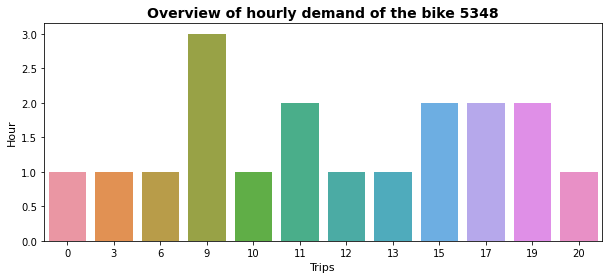

In [29]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=bike_info.index.get_level_values(0), y=bike_info["trip_id"],ax=ax)
pp.xlabel("Trips", fontdict={'size':11})
pp.ylabel("Hour", fontdict={"size":11})
pp.title("Overview of hourly demand of the bike 5348", fontsize=14.0, fontweight='bold')

pp.show()

In [30]:
#bike_info.head()

In [31]:
bike_info1 = bikes_info[bikes_info["bike_id"] == 3724]
bike_info1 = bike_info1.groupby(["hour"])["trip_id"].nunique()
bike_info1 = pd.DataFrame(bike_info1)
bike_info1.head()


,trip_id
hour,
0,10
1,7
2,8
3,3
4,2


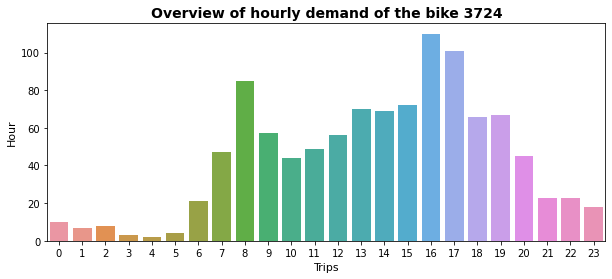

In [32]:
fig, ax = pp.subplots(figsize=(10,4))

sns.barplot(x=bike_info1.index.get_level_values(0), y=bike_info1["trip_id"],ax=ax)
pp.xlabel("Trips", fontdict={'size':11})
pp.ylabel("Hour", fontdict={"size":11})
pp.title("Overview of hourly demand of the bike 3724", fontsize=14.0, fontweight='bold')

pp.show()

## Status_Information

In [3]:
sta = pd.read_csv(r"C:\Users\ntpec\Downloads\indego-stations-2021-01-01.csv")

In [5]:
#convert to datetime so that we can manipulate the dates
sta["Go_live_date"] = pd.to_datetime(sta["Go_live_date"])
sta.head()

,Station_ID,Station_Name,Go_live_date,Status
0,3000,Virtual Station,2015-04-23,Active
1,3004,Municipal Services Building Plaza,2015-04-23,Active
2,3005,"Welcome Park, NPS",2015-04-23,Active
3,3006,40th & Spruce,2015-04-23,Active
4,3007,"11th & Pine, Kahn Park",2015-04-23,Active


In [ ]:
#we are looking for nan values 
sta.isna().sum()

In [6]:
#picking out the information for 2016
Station_2016 = sta[sta["Go_live_date"].isin(pd.date_range("2016-01-01", "2016-12-31"))]
#sorting the data ascending
Station_2016.sort_values(by='Go_live_date')

,Station_ID,Station_Name,Go_live_date,Status
105,3124,Race Street Pier,2016-03-31,Active
106,3125,15th & South,2016-04-08,Active
98,3117,ParkWest Town Center,2016-04-15,Active
100,3119,42nd & Lancaster,2016-04-25,Active
99,3118,"46th Street Station, MFL",2016-04-25,Active
102,3121,27th & Girard,2016-04-26,Active
101,3120,31st & Girard,2016-04-26,Active
104,3123,22nd & Cecil B. Moore,2016-04-27,Active
103,3122,"24th & Cecil B. Moore, Cecil B. Moore Library",2016-04-27,Inactive
75,3093,33rd & Diamond,2016-04-28,Active


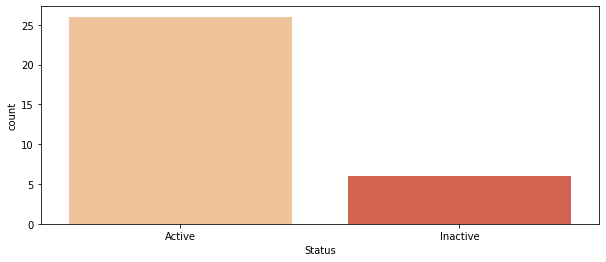

In [7]:
f, ax = plt.subplots(1, sharey=True, figsize=(10, 4))
#countplots
sns.countplot(x="Status",data= Station_2016,palette="OrRd")

plt.show()

In [8]:
Station_2016["month"] = Station_2016["Go_live_date"].apply(lambda dt: dt.month)
Station_2016["weekday"] = Station_2016["Go_live_date"].apply(lambda dt: dt.dayofweek)
Station_2016.head()

<ipython-input-8-214fe45029b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Station_2016["month"] = Station_2016["Go_live_date"].apply(lambda dt: dt.month)
<ipython-input-8-214fe45029b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Station_2016["weekday"] = Station_2016["Go_live_date"].apply(lambda dt: dt.dayofweek)


,Station_ID,Station_Name,Go_live_date,Status,month,weekday
75,3093,33rd & Diamond,2016-04-28,Active,4,3
76,3095,29th & Diamond,2016-04-28,Inactive,4,3
77,3096,29th & Dauphin,2016-04-29,Active,4,4
78,3097,"Berks Station, MFL",2016-04-29,Active,4,4
79,3098,10th & Federal,2016-05-02,Active,5,0


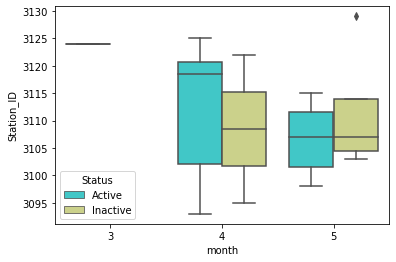

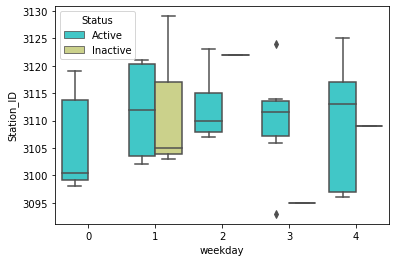

In [9]:
sns.boxplot(x="month",y="Station_ID", data= Station_2016 ,palette="rainbow", hue="Status")
plt.show()
sns.boxplot(x="weekday",y="Station_ID", data= Station_2016 ,palette="rainbow", hue="Status")
plt.show()

In [10]:
#picking out the unavaible stations
Station_2016.loc[Station_2016['Status'] == "Inactive"]

,Station_ID,Station_Name,Go_live_date,Status,month,weekday
76,3095,29th & Diamond,2016-04-28,Inactive,4,3
84,3103,"27th & Master, Athletic Recreation Center",2016-05-03,Inactive,5,1
86,3105,Penn Treaty Park,2016-05-03,Inactive,5,1
90,3109,Parkside & Girard,2016-05-06,Inactive,5,4
103,3122,"24th & Cecil B. Moore, Cecil B. Moore Library",2016-04-27,Inactive,4,2
107,3129,"The Children's Hospital of Philadelphia, Osler...",2016-05-24,Inactive,5,1


### Visualize unavailable stations 

In [ ]:
#df2 = pd.concat([df, Station_2016])
#df2.loc[df2["start_station_id"]== 3095]
#df2.loc[df2["start_station_id"]== 3103]
#df2.loc[df2["start_station_id"]== 3105]
#df2.loc[df2["start_station_id"]== 3109]
#df2.loc[df2["start_station_id"]== 3122]
#df2.loc[df2["start_station_id"]== 3129]

In [11]:
m = folium.Map(location=[39.952583,-75.165222], zoom_start = 13) 
tooltip = "29th & Diamond"
tooltip1 = "27th & Master, Athletic Recreation Center"
tooltip2 = "Penn Treaty Park"
tooltip3 = "Parkside & Girard"
tooltip4 = "24th & Cecil B. Moore, Cecil B. Moore Library"
tooltip5 = "The Children's Hospital of Philadelphia, Osler..."
folium.Marker(
    [39.987709, -75.1805], popup="UNAVAIBLE", tooltip=tooltip
    
).add_to(m)
folium.Marker(
    [39.977139, -75.179398], popup="UNAVAIBLE", tooltip=tooltip1
    
).add_to(m)

folium.Marker(
    [39.966518, -75.129959], popup="UNAVAIBLE", tooltip=tooltip2
    
).add_to(m)
folium.Marker(
    [39.974861, -75.205238], popup="UNAVAIBLE", tooltip=tooltip3
    
).add_to(m)
folium.Marker(
    [39.980621, -75.1735], popup="UNAVAIBLE", tooltip=tooltip4
    
).add_to(m)
folium.Marker(
    [39.946812, -75.193108], popup="UNAVAIBLE", tooltip=tooltip5
    
).add_to(m)
m